<img style="float: right;" src="https://upload.wikimedia.org/wikipedia/commons/f/f5/Best_Buy_Logo.svg" alt="bb logo" width="100"/>

<h1><FONT COLOR=#0000E5>BESTBUY </FONT COLOR=#195071>Televisions</h1>

## 📉 Data Analysis <SPAN STYLE="font-size:18.0pt;font-family:Georgia;">II</span>

In [23]:
import numpy as np
import pandas as pd
import re

In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [25]:
bb = pd.read_csv('python_proj\\bb_clean.csv')
bb = bb.set_index('sku')

In [26]:
bb.columns
#bb.groupby('smart_capable').agg('count')

Index(['color', 'curved', 'display_type', 'energy_KWh', 'height_nostand',
       'manufacturer', 'model_num', 'model_year', 'online_avail', 'refresh_Hz',
       'regular_px', 'resolution', 'review_average', 'review_count', 'sale_px',
       'size_class', 'screen_size', 'smart_capable', 'store_avail',
       'sub_class', 'top_class', 'tv_name', 'warranty_yrs', 'weight_nostand',
       'width', 'bezel'],
      dtype='object')

<h2>Television <FONT COLOR=#FF0000>Pricing</FONT COLOR=#FF0000> & correlation with:</h2>

- ScreenSize, Resolution, Bezel, Weight, ReviewScore, SmartCapable, WarrantyYears, EnergyCons, & RefreshRate,

#### Most of the data we need for calculation of correlation is already in dtype=float64, except Resolution...
    4K (2160p) | 8K (4320p) | Full HD (1080p) | HD (720p)
    
- convert Resolution object to float64 (in # of pixels) using **regex (\d{3,})** = *consecutive 3 or more digits*

In [27]:
bb['res_pixels'] = bb.resolution.str.extract('(\d{3,})').astype('int64')

In [28]:
bb.res_pixels.head()

sku
6466022    2160
6414244    2160
6461913    2160
6466017    2160
5900939    2160
Name: res_pixels, dtype: int64

In [29]:
# Create separate DF for calculation of correlations
bb_corr = bb[['regular_px','screen_size','res_pixels','bezel','weight_nostand','review_average', 
               'smart_capable','warranty_yrs','energy_KWh','refresh_Hz']]
bb_corr.columns = ['PRICE','SIZE','RES','BEZ','WGT','REV','SMRT','WARR','ENRG','RFSH']

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
bb_corr.corr()

,PRICE,SIZE,RES,BEZ,WGT,REV,SMRT,WARR,ENRG,RFSH
PRICE,1.000000,0.480195,0.518736,0.157684,0.599525,-0.061083,-0.074320,0.160455,0.562496,0.409446
SIZE,0.480195,1.000000,0.517305,0.439187,0.906950,0.094499,0.177251,0.016671,0.660207,0.412618
RES,0.518736,0.517305,1.000000,0.265191,0.505442,-0.015331,0.137568,-0.010195,0.683329,0.407168
BEZ,0.157684,0.439187,0.265191,1.000000,0.286380,0.137281,0.297115,-0.093030,0.281804,0.304654
WGT,0.599525,0.906950,0.505442,0.286380,1.000000,0.039812,0.026823,0.108065,0.673784,0.466050
REV,-0.061083,0.094499,-0.015331,0.137281,0.039812,1.000000,0.200185,-0.174841,-0.027597,0.072643
SMRT,-0.074320,0.177251,0.137568,0.297115,0.026823,0.200185,1.000000,-0.562017,0.045759,0.213204
WARR,0.160455,0.016671,-0.010195,-0.093030,0.108065,-0.174841,-0.562017,1.000000,-0.010738,-0.057865
ENRG,0.562496,0.660207,0.683329,0.281804,0.673784,-0.027597,0.045759,-0.010738,1.000000,0.423552
RFSH,0.409446,0.412618,0.407168,0.304654,0.466050,0.072643,0.213204,-0.057865,0.423552,1.000000


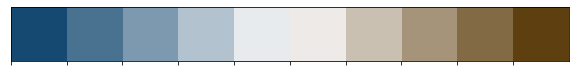

In [32]:
n_plots = 10
sns.palplot(sns.diverging_palette(245,50, s=90, l=30, sep=20, n=n_plots))

<AxesSubplot:>

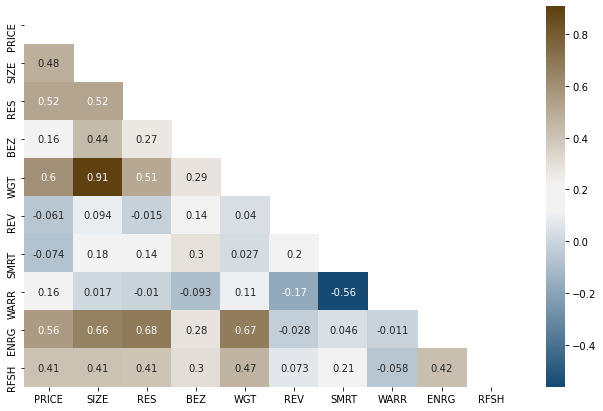

In [33]:
fig, ax = plt.subplots(figsize=(11, 7))

# Hide upper redundant heatmap
hide = np.triu(np.ones_like(bb_corr.corr(), dtype=bool))

# Configure a custom diverging colormap
n_plots = 10
cmap = sns.diverging_palette(245,50, s=90, l=30, sep=20, n=n_plots, as_cmap=True)

# Draw the heatmap
sns.heatmap(bb_corr.corr(), annot=True, mask = hide, cmap=cmap)

In [34]:
# percentage% of NOT smart capable
bb_corr.groupby('SMRT').size().loc[False]/bb_corr.groupby('SMRT').count().sum()[0]

0.08564231738035265

In [35]:
ALL_corr = bb[['size_class','regular_px','res_pixels','bezel','review_average','smart_capable','refresh_Hz']]
ALL_corr.columns = ['size_class','PRICE','RES','BEZ','REV','SMRT','RFSH']
ALL_corr = ALL_corr.groupby('size_class').agg('corr')

Text(0.1, 1.05, 'Correlation Heatmap by Size Class')

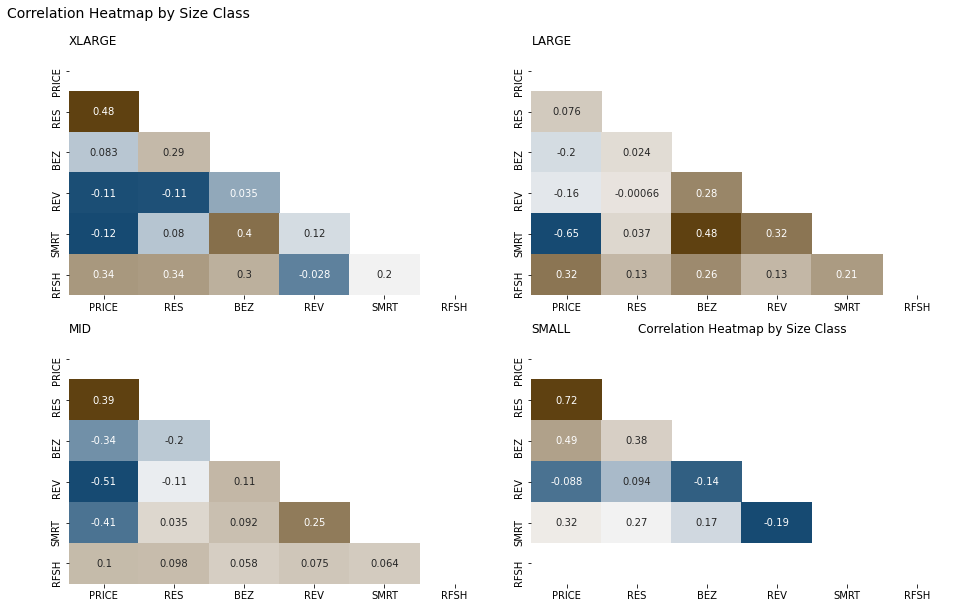

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 8))
plt.title('Correlation Heatmap by Size Class')
plt.tight_layout()

hide = np.triu(np.ones_like(ALL_corr.loc['XLARGE'], dtype=bool))
sns.heatmap(ALL_corr.loc['XLARGE'], ax=axes[0,0], annot=True, mask = hide, cmap=cmap, cbar=False)
axes[0,0].set_title('XLARGE', loc='left', fontweight='light')

hide = np.triu(np.ones_like(ALL_corr.loc['LARGE'], dtype=bool))
sns.heatmap(ALL_corr.loc['LARGE'], ax=axes[0,1], annot=True, mask = hide, cmap=cmap, cbar=False)
axes[0,1].set_title('LARGE', loc='left', fontweight='light')

hide = np.triu(np.ones_like(ALL_corr.loc['MID'], dtype=bool))
sns.heatmap(ALL_corr.loc['MID'], ax=axes[1,0], annot=True, mask = hide, cmap=cmap, cbar=False)
axes[1,0].set_title('MID', loc='left', fontweight='light')

hide = np.triu(np.ones_like(ALL_corr.loc['SMALL'], dtype=bool))
sns.heatmap(ALL_corr.loc['SMALL'], ax=axes[1,1], annot=True, mask = hide, cmap=cmap, cbar=False)
axes[1,1].set_title('SMALL', loc='left', fontweight='light')

fig.suptitle('Correlation Heatmap by Size Class', fontsize=14, y=1.05, fontweight='normal', x=0.1)

## Heat Map Findings
0. Very few variables had high correlation (and only 1 had over 0.7), maybe branding is the biggest factor
1. Unsurprisingly, highest correlation to price from Resolution
    - However, there is no such correlation for LARGE (45-60") TVs
2. LARGE size TVs show a negative correlation btwn Price and smart capable
3. Price and review scores no corr, & MID size TVs show a negative corr
4. Bezel size only had correlation with Price for SMALL TVs

## Further investigate each of these findings

In [37]:
n_plots = 4
sns.set_palette(sns.color_palette("cividis", n_plots), n_plots)

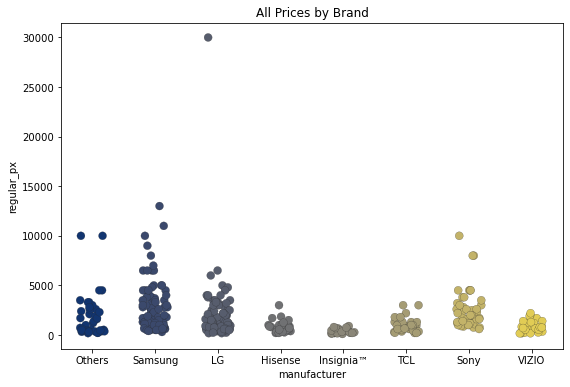

In [41]:
fig = plt.gcf()
fig.set_size_inches(9,6)
sns.stripplot(data = bb, x='manufacturer', y='regular_px', jitter=0.2, 
              size=8, palette="cividis", linewidth=0.2).set_title('All Prices by Brand')
plt.show()

#### Get rid of the monstrous outlier TV from manufacturer LG
- go through each manuf and remove price outliers ( >3 std)

In [39]:
bby = pd.DataFrame()

#loop through each manufurer and filter outliers
#then concat filtered list of TVs to new bby DataFrame
for each in bb.manufacturer.unique():
    bby = pd.concat([bby,bb.loc[bb['manufacturer']==each,:]\
                    .loc[(bb.regular_px - bb.regular_px.mean()).abs() / bb.regular_px.std() < 3]])

In [22]:
bby.shape[0] - bb.shape[0]

-8

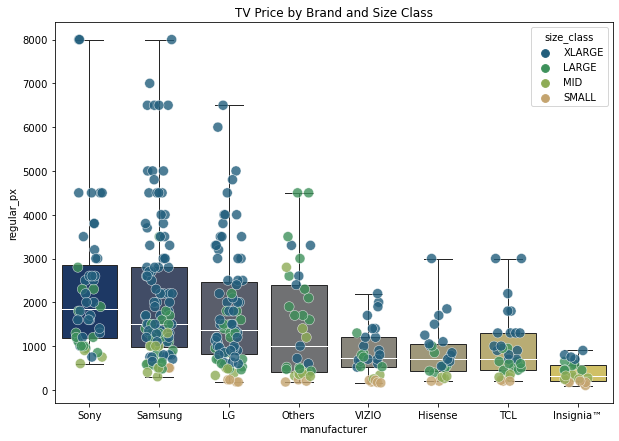

In [51]:
fig = plt.gcf()
fig.set_size_inches(10,7)

# set order of x-axis categories
order = bby.groupby('manufacturer').median()['regular_px'].sort_values(ascending=False).index
hue_order = bby.groupby('size_class').median()['screen_size'].sort_values(ascending=False).index

# change median line to white
PROPS = {'medianprops':{'color':'white'}}

# Plot scatter over boxplot
ax = sns.boxplot(data = bby, x='manufacturer', y='regular_px',
                order=order, palette='cividis', linewidth=1, whis=np.inf, **PROPS)\
                .set_title('TV Price by Brand and Size Class')
ax = sns.stripplot(data = bby, x='manufacturer', y='regular_px', hue='size_class', jitter=0.2, 
                   order=order, hue_order=hue_order, size=10,
                   palette='gist_earth', linewidth=0.5, edgecolor='w', alpha=0.8)
plt.show()

Text(0.5, 1.0, 'Smart Capable vs Price (LARGE TVs)')

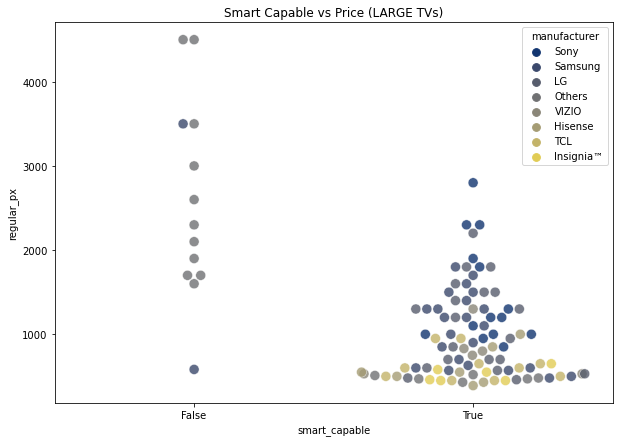

In [101]:
fig = plt.gcf()
fig.set_size_inches(10,7)

# # set order of x-axis categories
hue_order = bby.groupby('manufacturer').median()['regular_px'].sort_values(ascending=False).index
# hue_order = bby.groupby('size_class').median()['screen_size'].sort_values(ascending=False).index

sns.swarmplot(data = bby[bby.size_class=='LARGE'], x='smart_capable', y='regular_px', hue='manufacturer', 
              size = 10, hue_order=hue_order,
              palette='cividis', linewidth=0.5, edgecolor='w', alpha=0.8)\
                .set_title('Smart Capable vs Price (LARGE TVs)')


In [79]:
# Why resolution doesn't affect price in the LARGE size_class
# All are 4K except 1
bby.groupby(['size_class','resolution']).count()['regular_px']

size_class  resolution     
LARGE       4K (2160p)         104
            8K (4320p)           1
MID         4K (2160p)          30
            Full HD (1080p)     11
            HD (720p)            1
SMALL       4K (2160p)           2
            Full HD (1080p)      8
            HD (720p)           17
XLARGE      4K (2160p)         192
            8K (4320p)          23
Name: regular_px, dtype: int64

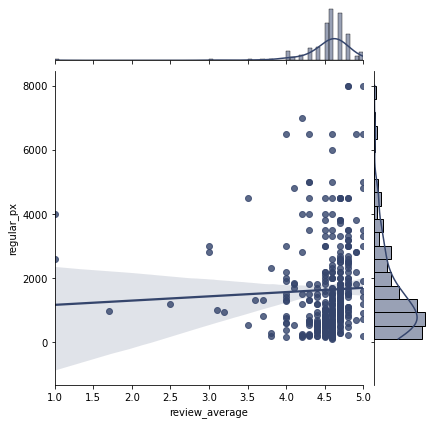

In [114]:
# Review scores and price show no relationship
sns.jointplot(data = bby, x='review_average', y='regular_px', kind='reg', palette='cividis')

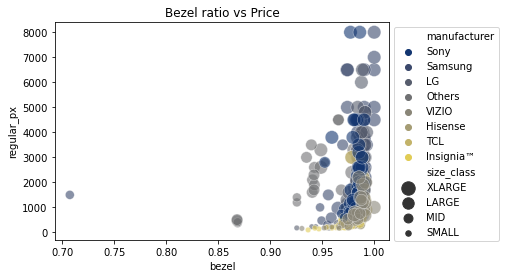

In [115]:
# set order of x-axis categories
hue_order = bby.groupby('manufacturer').median()['regular_px'].sort_values(ascending=False).index
size_order = bby.groupby('size_class').median()['screen_size'].sort_values(ascending=False).index

sns.scatterplot(data = bby, x='bezel', y='regular_px', hue='manufacturer', hue_order=hue_order,
                size = 'size_class', sizes=(30, 180), size_order=size_order,
                palette='cividis', linewidth=0.5, edgecolor='w', alpha=0.6)\
                .set_title('Bezel ratio vs Price')
plt.legend(bbox_to_anchor=(1, 1))

#### Get rid of the Ugly TV from manufacturer Others, with a 0.7 bezel ratio
- go through each manuf and remove bezel outliers ( >3 std)

In [95]:
bbyy = pd.DataFrame()

#loop through each manufurer and filter outliers
#then concat filtered list of TVs to new bby DataFrame
for each in bby.manufacturer.unique():
    bbyy = pd.concat([bbyy,bby.loc[bb['manufacturer']==each,:]\
                    .loc[(bb.bezel - bb.bezel.mean()).abs() / bb.bezel.std() < 3]])

In [99]:
bbyy.shape[0] - bby.shape[0]

-5

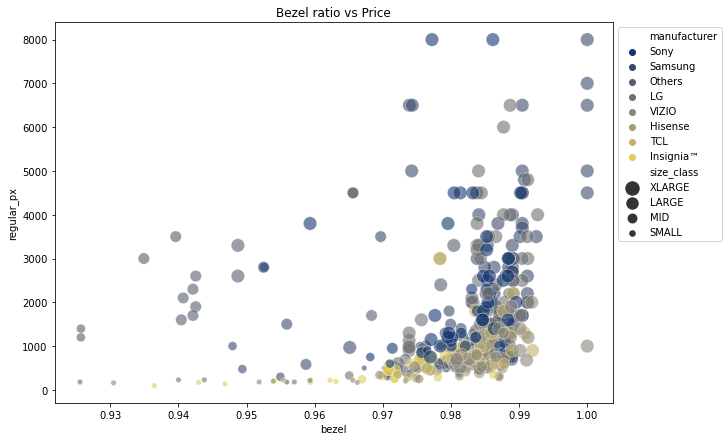

In [116]:
fig = plt.gcf()
fig.set_size_inches(10,7)
# set order of x-axis categories
hue_order = bbyy.groupby('manufacturer').median()['regular_px'].sort_values(ascending=False).index
size_order = bbyy.groupby('size_class').median()['screen_size'].sort_values(ascending=False).index

sns.scatterplot(data = bbyy, x='bezel', y='regular_px', hue='manufacturer', hue_order=hue_order,
                size = 'size_class', sizes=(30, 180), size_order=size_order,
                palette='cividis', linewidth=0.5, edgecolor='w', alpha=0.6)\
                .set_title('Bezel ratio vs Price')
plt.legend(bbox_to_anchor=(1, 1))